In [106]:
#loading the dataset

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df=pd.read_csv('data/credit_data.csv')

In [32]:
import os
os.chdir(r'C:\Users\klpna\OneDrive\Desktop\explainable-credit-risk')

In [33]:
df.head(3)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [34]:
del df['Unnamed: 0']

In [35]:
df.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [37]:
df.isnull().sum()


SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [38]:
df.shape

(150000, 11)

In [39]:
#removing null values

In [40]:
df.dropna(inplace=True)

In [41]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [42]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [43]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    111912
1      8357
Name: count, dtype: int64

In [44]:
#visualizing graph

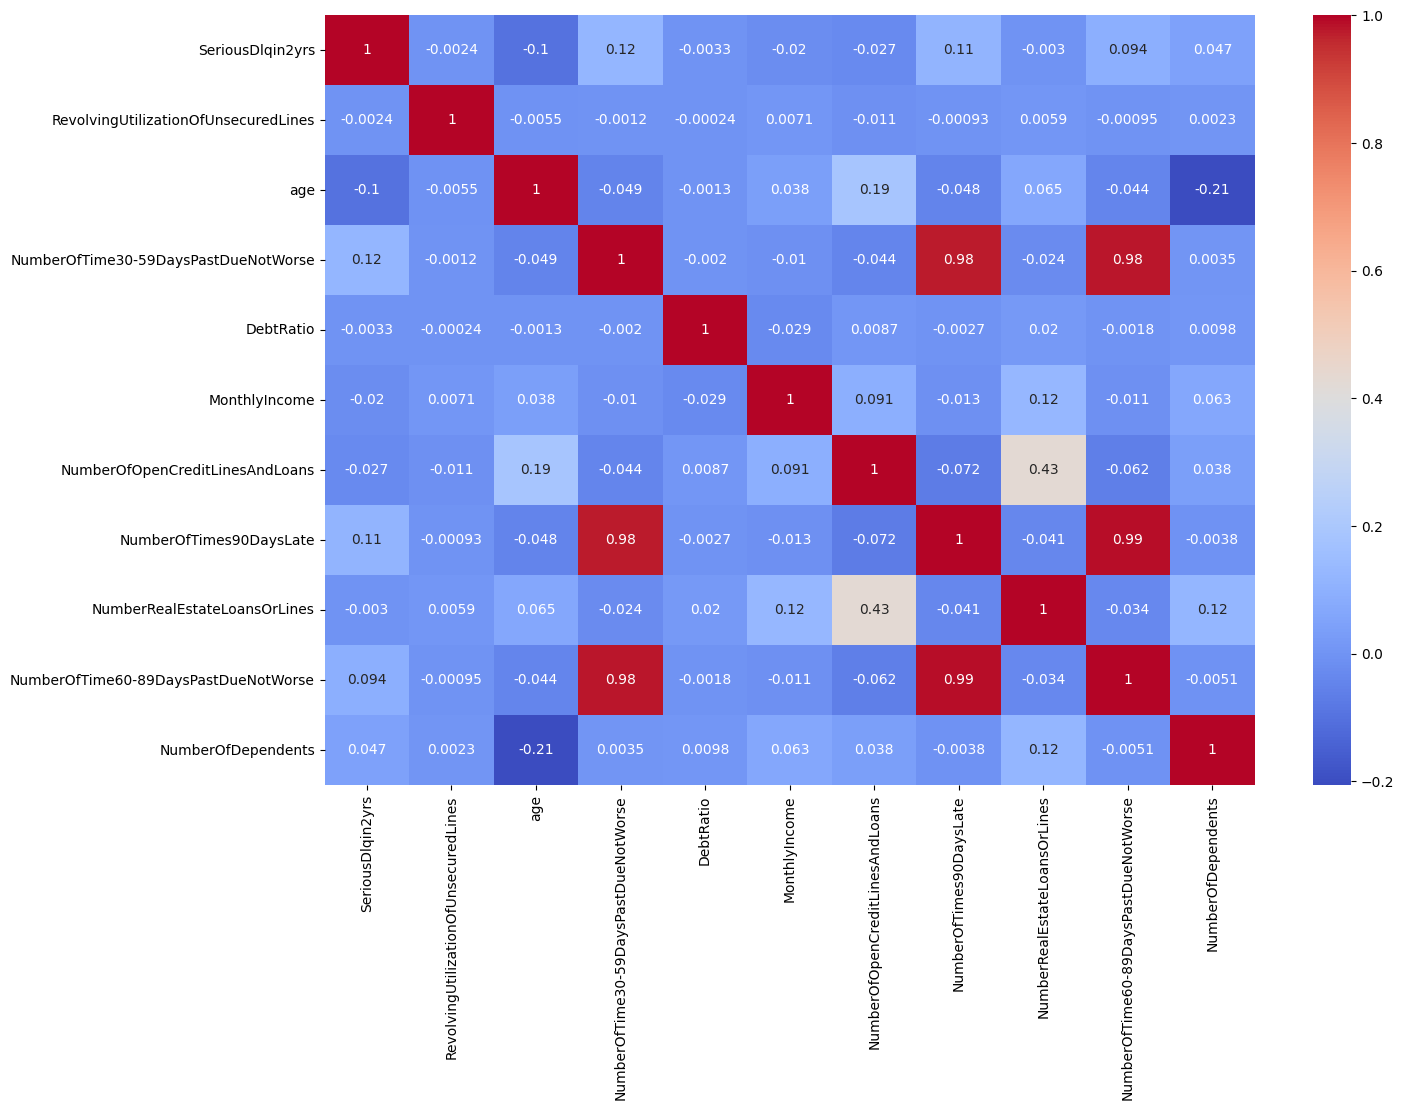

In [45]:
plt.figure(figsize=(15, 10))  # Bigger size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


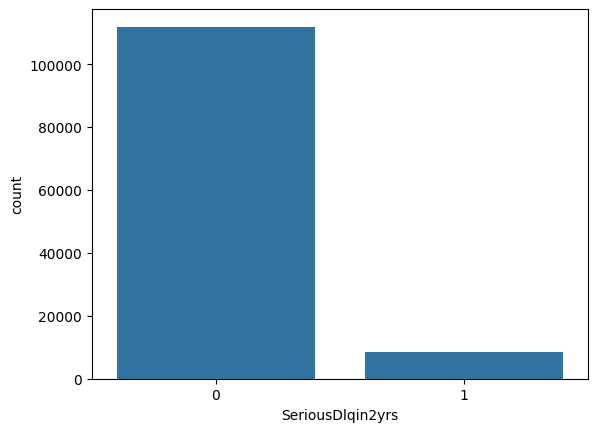

In [46]:

# Histogram of a column
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.show()


In [47]:
from imblearn.over_sampling import SMOTE

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Recombine into a DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['SeriousDlqin2yrs'] = y_resampled



In [48]:
print(df['SeriousDlqin2yrs'].value_counts())


SeriousDlqin2yrs
1    111912
0    111912
Name: count, dtype: int64


In [49]:
#outlinear

<Axes: >

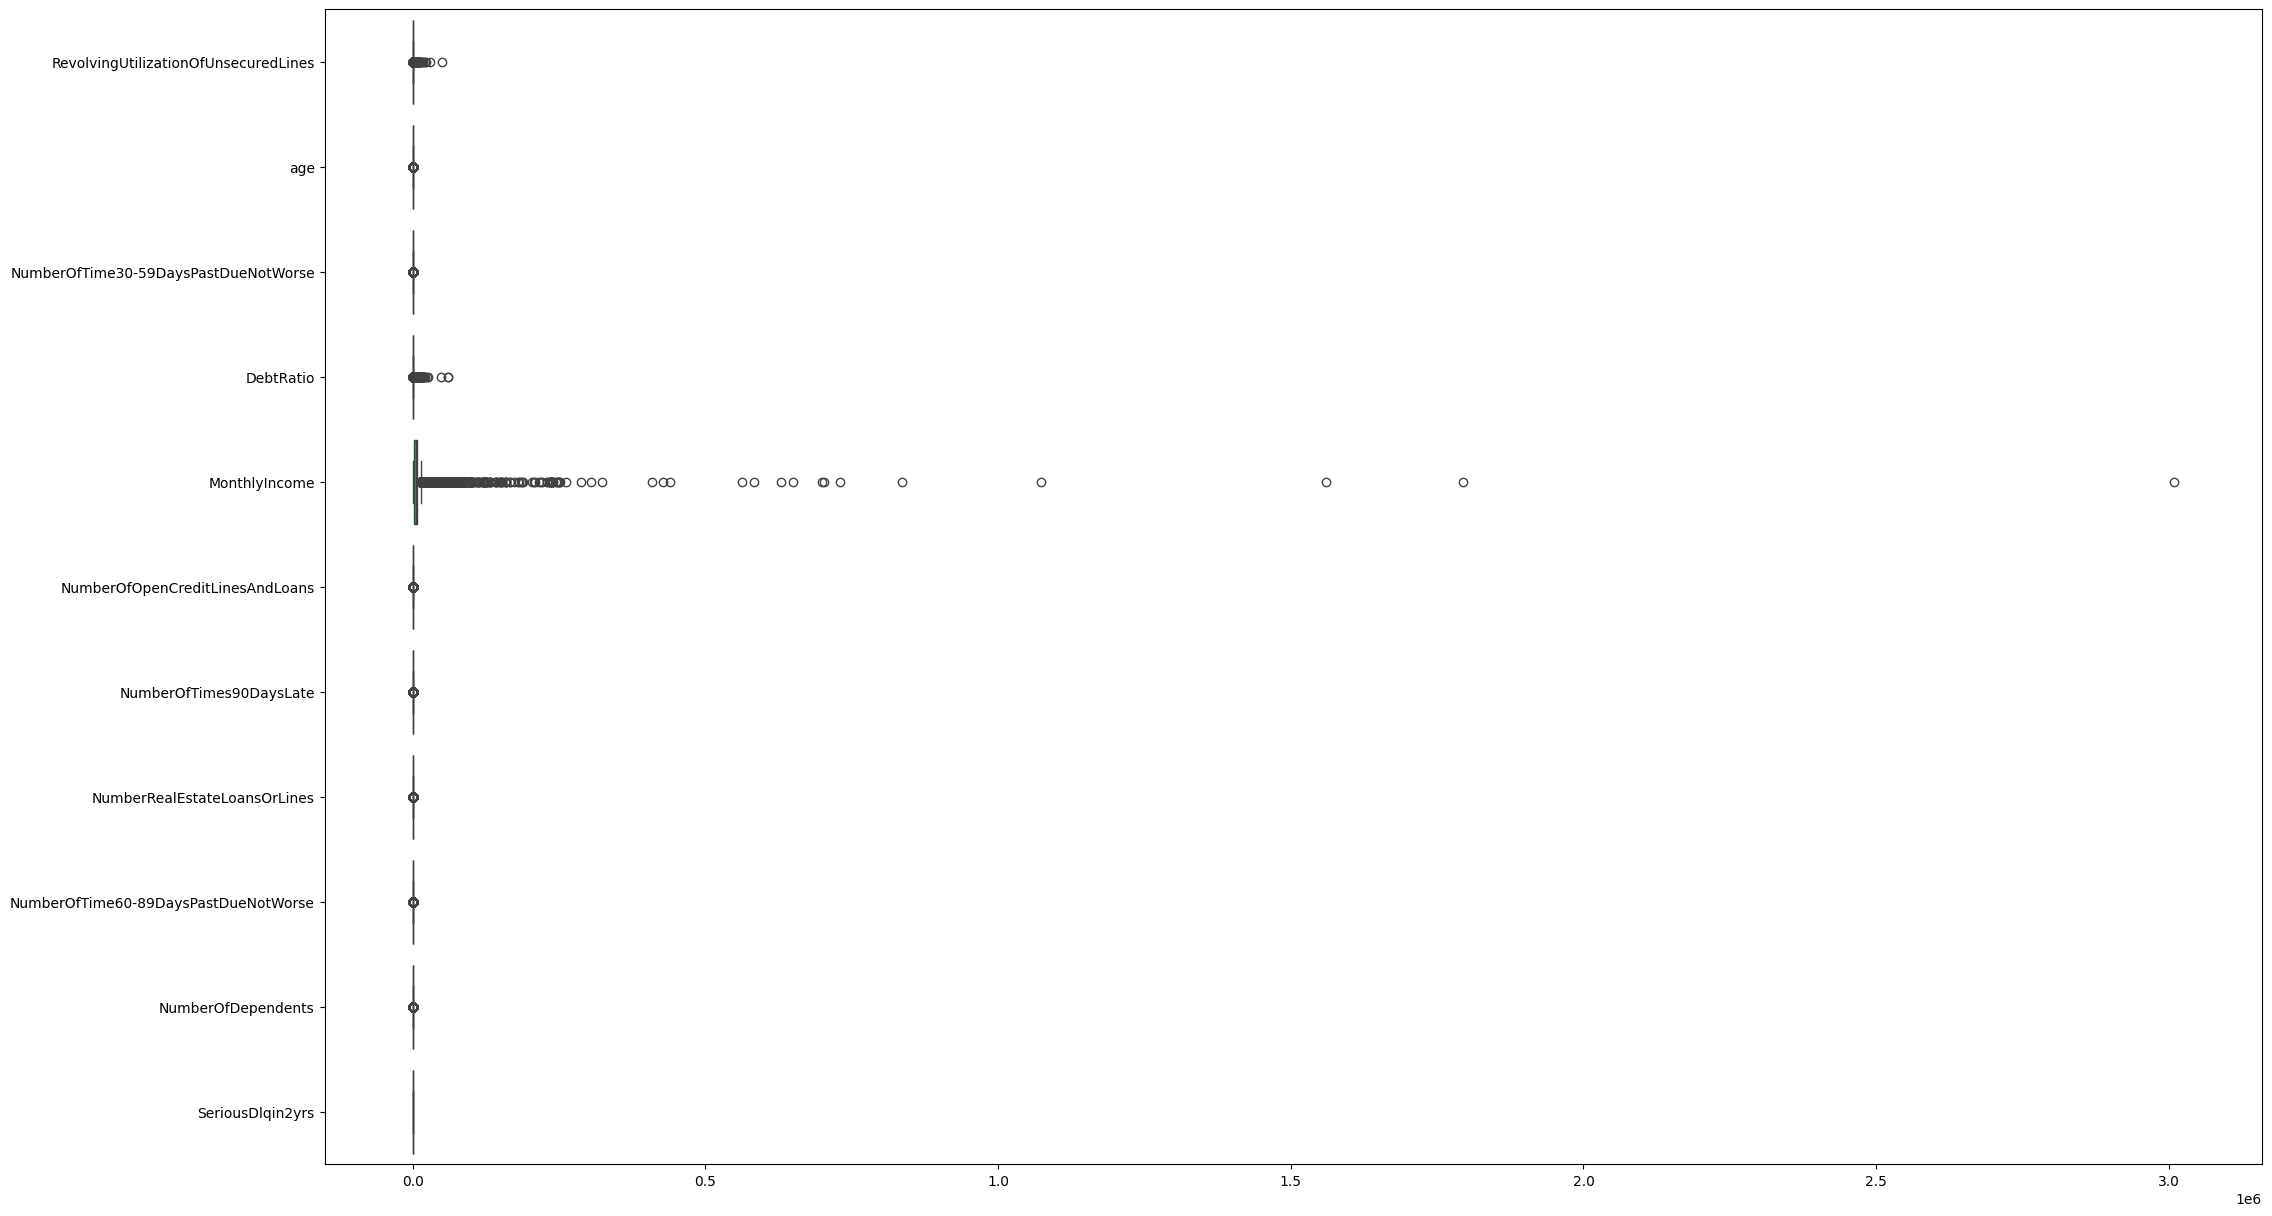

In [50]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df,orient='h')

In [51]:
#removing outlinear

In [52]:
from scipy.stats import norm

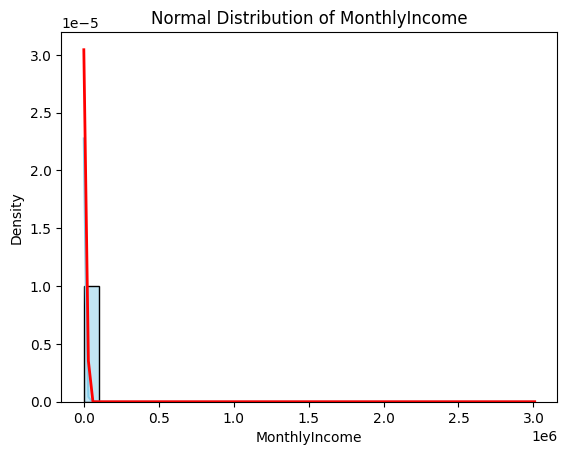

In [53]:
# Plot histogram
data=df['MonthlyIncome']
sns.histplot(data, kde=True, stat="density", bins=30, color='skyblue')

# Fit a normal distribution and plot the curve
mu, std = norm.fit(data)
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f"Normal Distribution of {data.name}")
plt.xlabel(data.name)
plt.ylabel("Density")
plt.show()


In [54]:
cols = ['MonthlyIncome','DebtRatio','RevolvingUtilizationOfUnsecuredLines']
df = df[~((df[cols] < (df[cols].quantile(0.25) - 1.5*(df[cols].quantile(0.75)-df[cols].quantile(0.25)))) | 
                (df[cols] > (df[cols].quantile(0.75) + 1.5*(df[cols].quantile(0.75)-df[cols].quantile(0.25))))).any(axis=1)]


In [55]:
print(df['SeriousDlqin2yrs'].value_counts())

SeriousDlqin2yrs
1    100368
0     99710
Name: count, dtype: int64


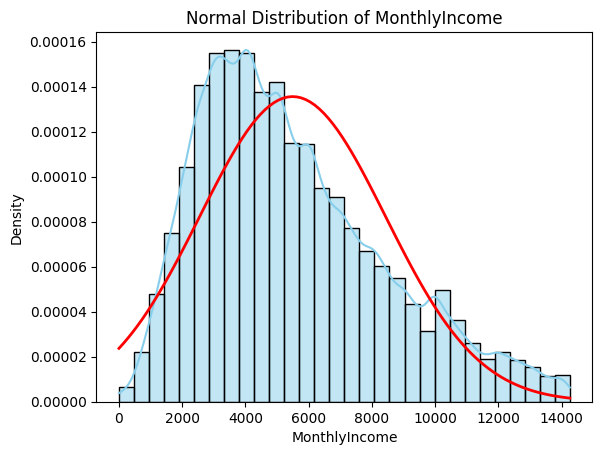

In [56]:
# Plot histogram
data=df['MonthlyIncome']
sns.histplot(data, kde=True, stat="density", bins=30, color='skyblue')

# Fit a normal distribution and plot the curve
mu, std = norm.fit(data)
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f"Normal Distribution of {data.name}")
plt.xlabel(data.name)
plt.ylabel("Density")
plt.show()


<Axes: >

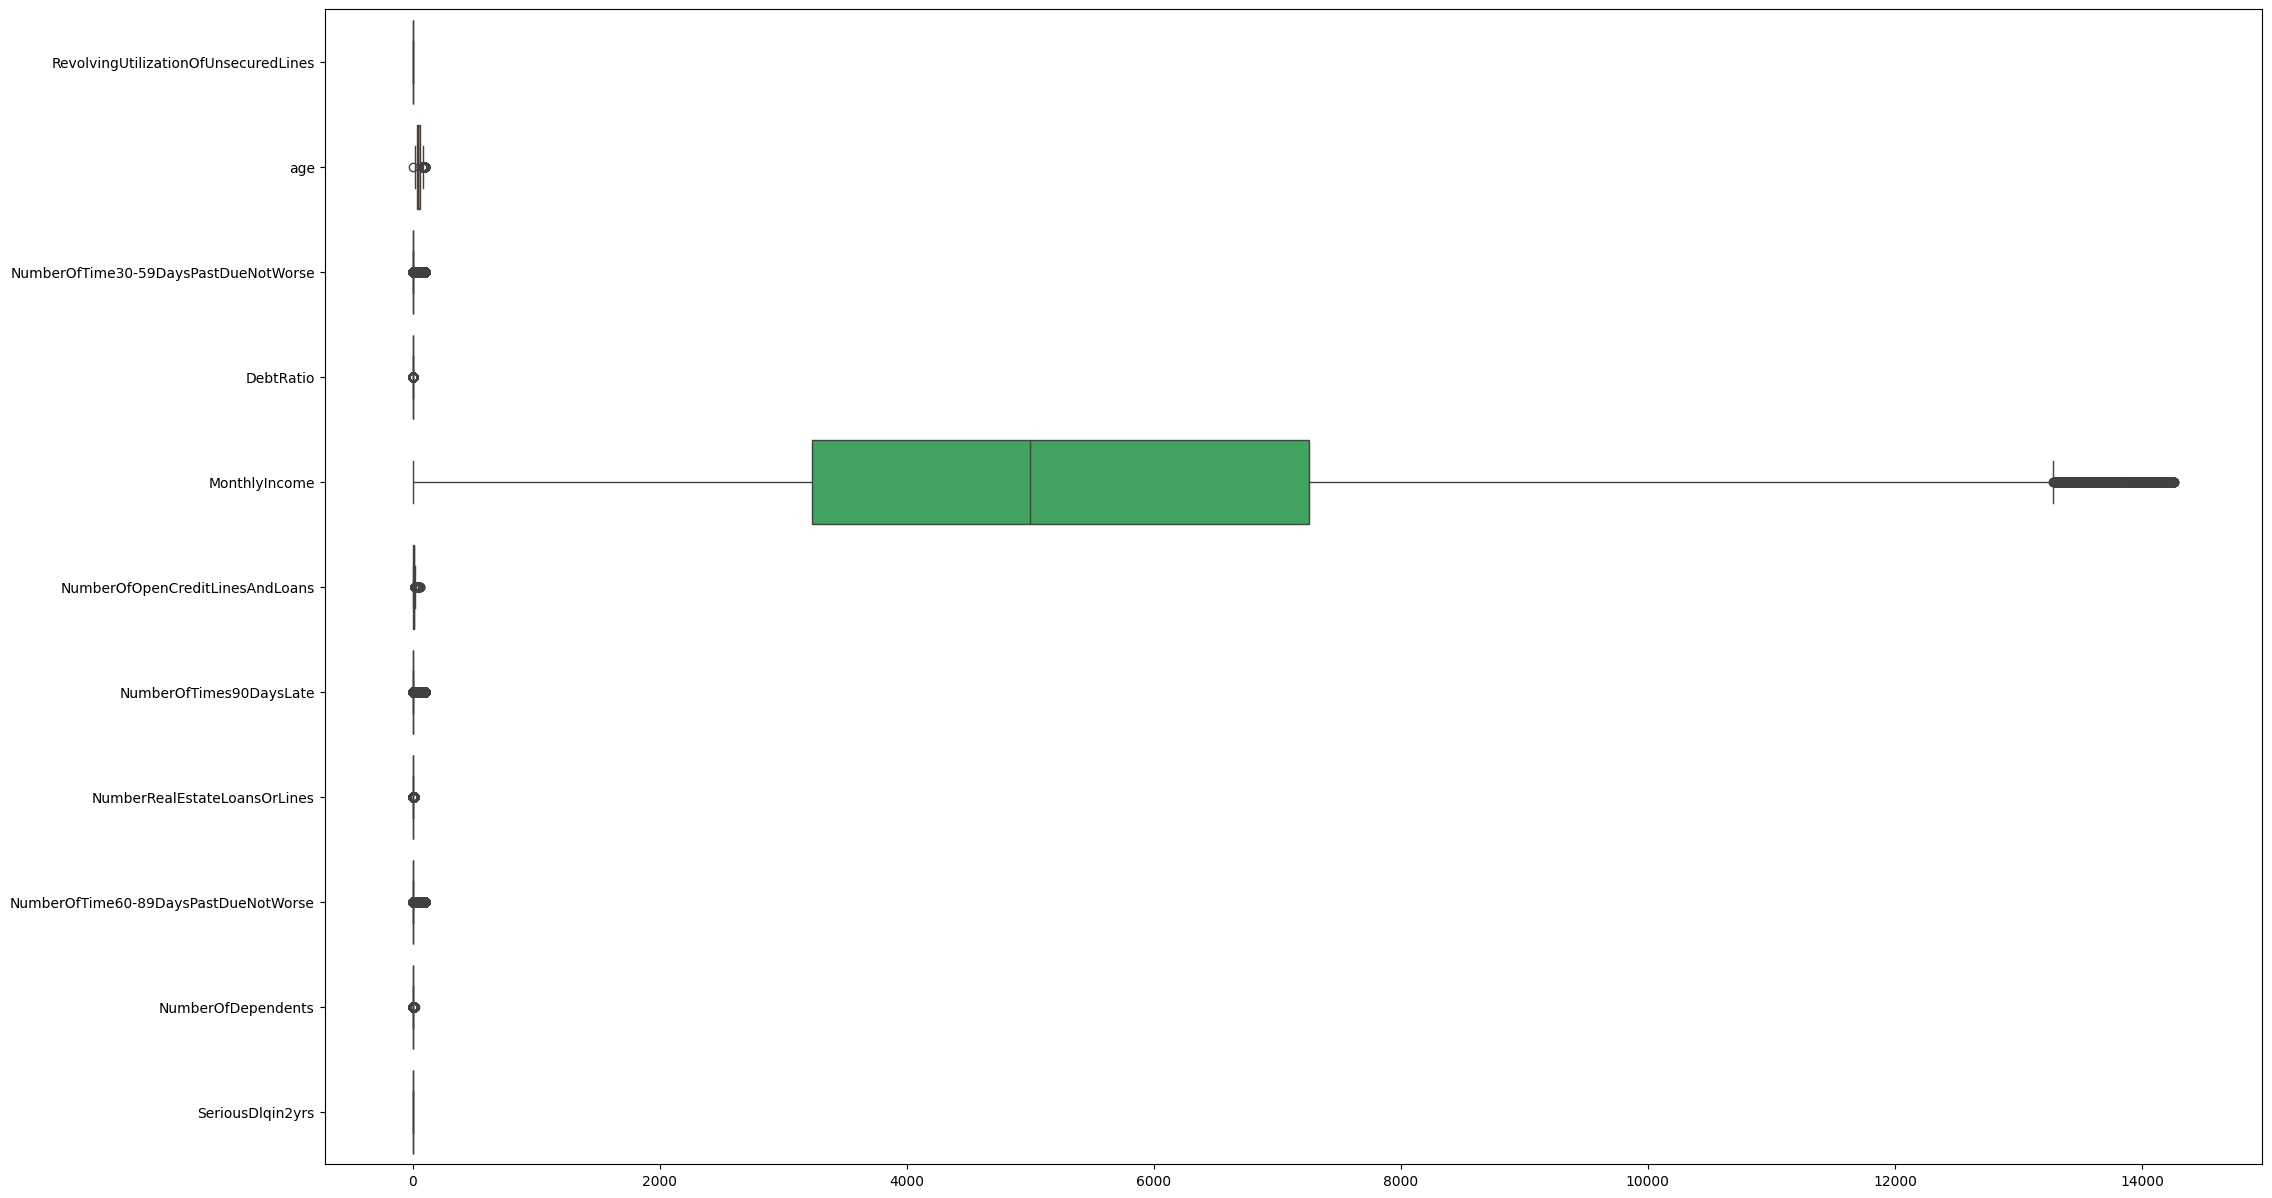

In [57]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df,orient='h')

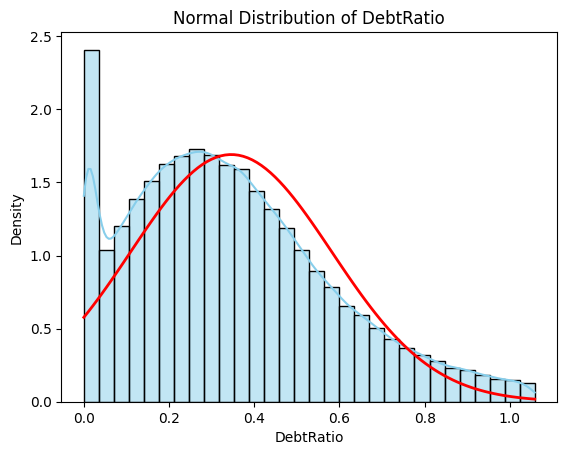

In [58]:
# Plot histogram
data=df['DebtRatio']
sns.histplot(data, kde=True, stat="density", bins=30, color='skyblue')

# Fit a normal distribution and plot the curve
mu, std = norm.fit(data)
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f"Normal Distribution of {data.name}")
plt.xlabel(data.name)
plt.ylabel("Density")
plt.show()


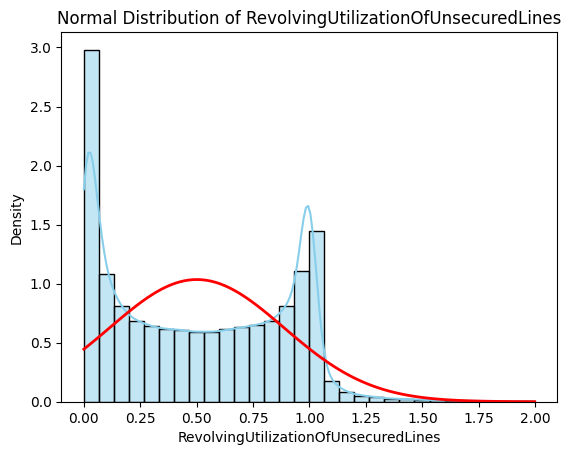

In [59]:
# Plot histogram
data=df['RevolvingUtilizationOfUnsecuredLines']
sns.histplot(data, kde=True, stat="density", bins=30, color='skyblue')

# Fit a normal distribution and plot the curve
mu, std = norm.fit(data)
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

plt.title(f"Normal Distribution of {data.name}")
plt.xlabel(data.name)
plt.ylabel("Density")
plt.show()


In [60]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
1    100368
0     99710
Name: count, dtype: int64

In [61]:
#feature scaling

In [62]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# Store target column
target = df['SeriousDlqin2yrs']

# Select features only (exclude target column)
features = df.drop('SeriousDlqin2yrs', axis=1)

# Apply scaling
df = pd.DataFrame(ss.fit_transform(features), columns=features.columns)

# Add target column back
df['SeriousDlqin2yrs'] = target.values


In [63]:
print(df['SeriousDlqin2yrs'].value_counts())

SeriousDlqin2yrs
1    100368
0     99710
Name: count, dtype: int64


<Axes: >

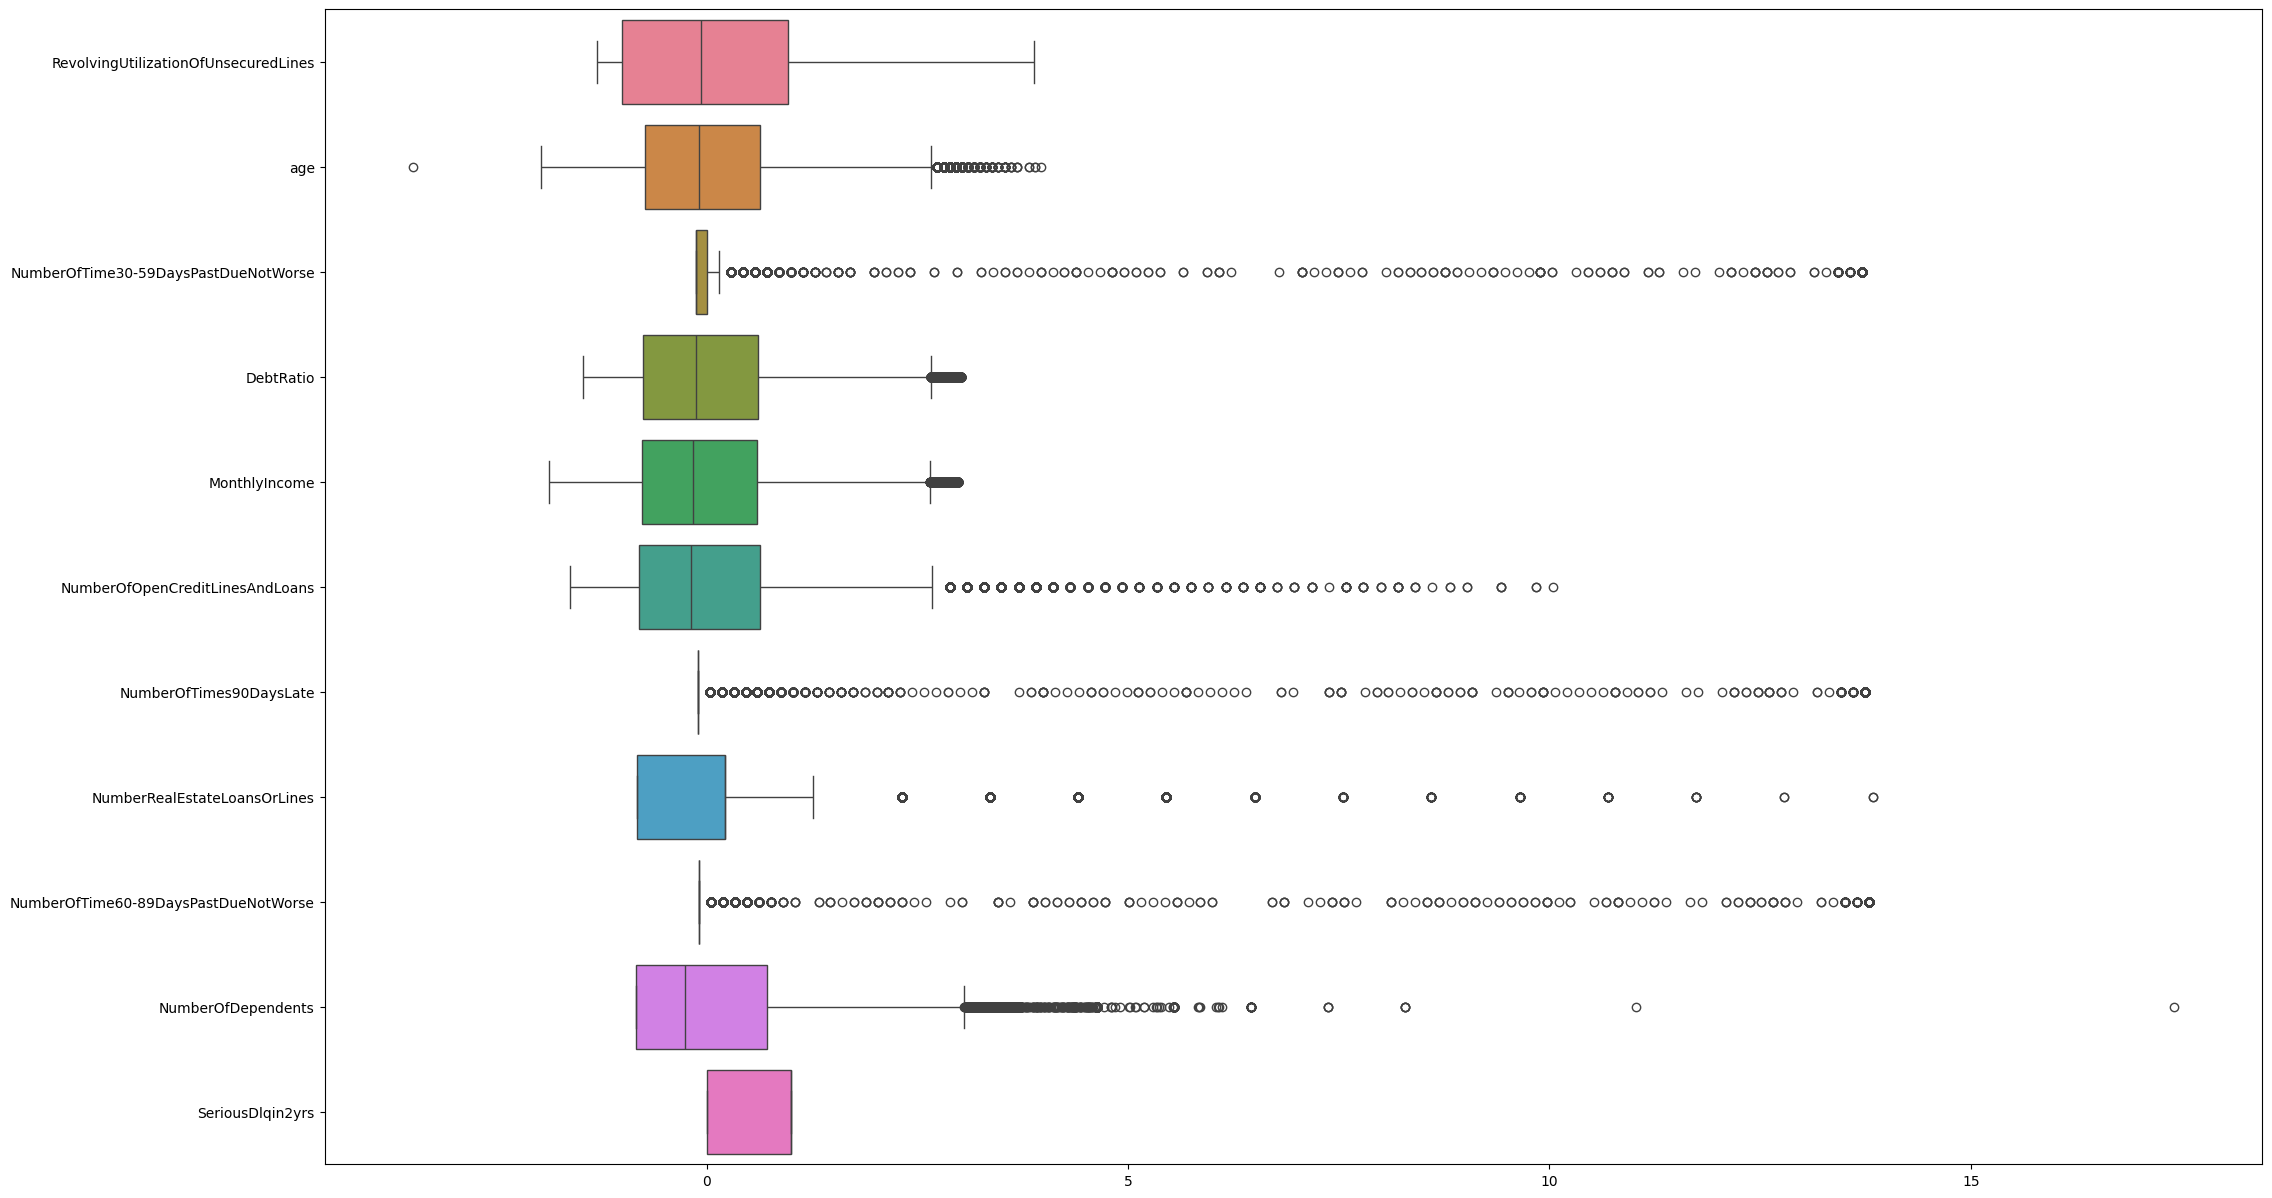

In [64]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df,orient='h')

In [65]:
df.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

In [66]:
cols = ['RevolvingUtilizationOfUnsecuredLines','age', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse','NumberOfDependents']
df = df[~((df[cols] < (df[cols].quantile(0.25) - 1.5*(df[cols].quantile(0.75)-df[cols].quantile(0.25)))) | 
                (df[cols] > (df[cols].quantile(0.75) + 1.5*(df[cols].quantile(0.75)-df[cols].quantile(0.25))))).any(axis=1)]


<Axes: >

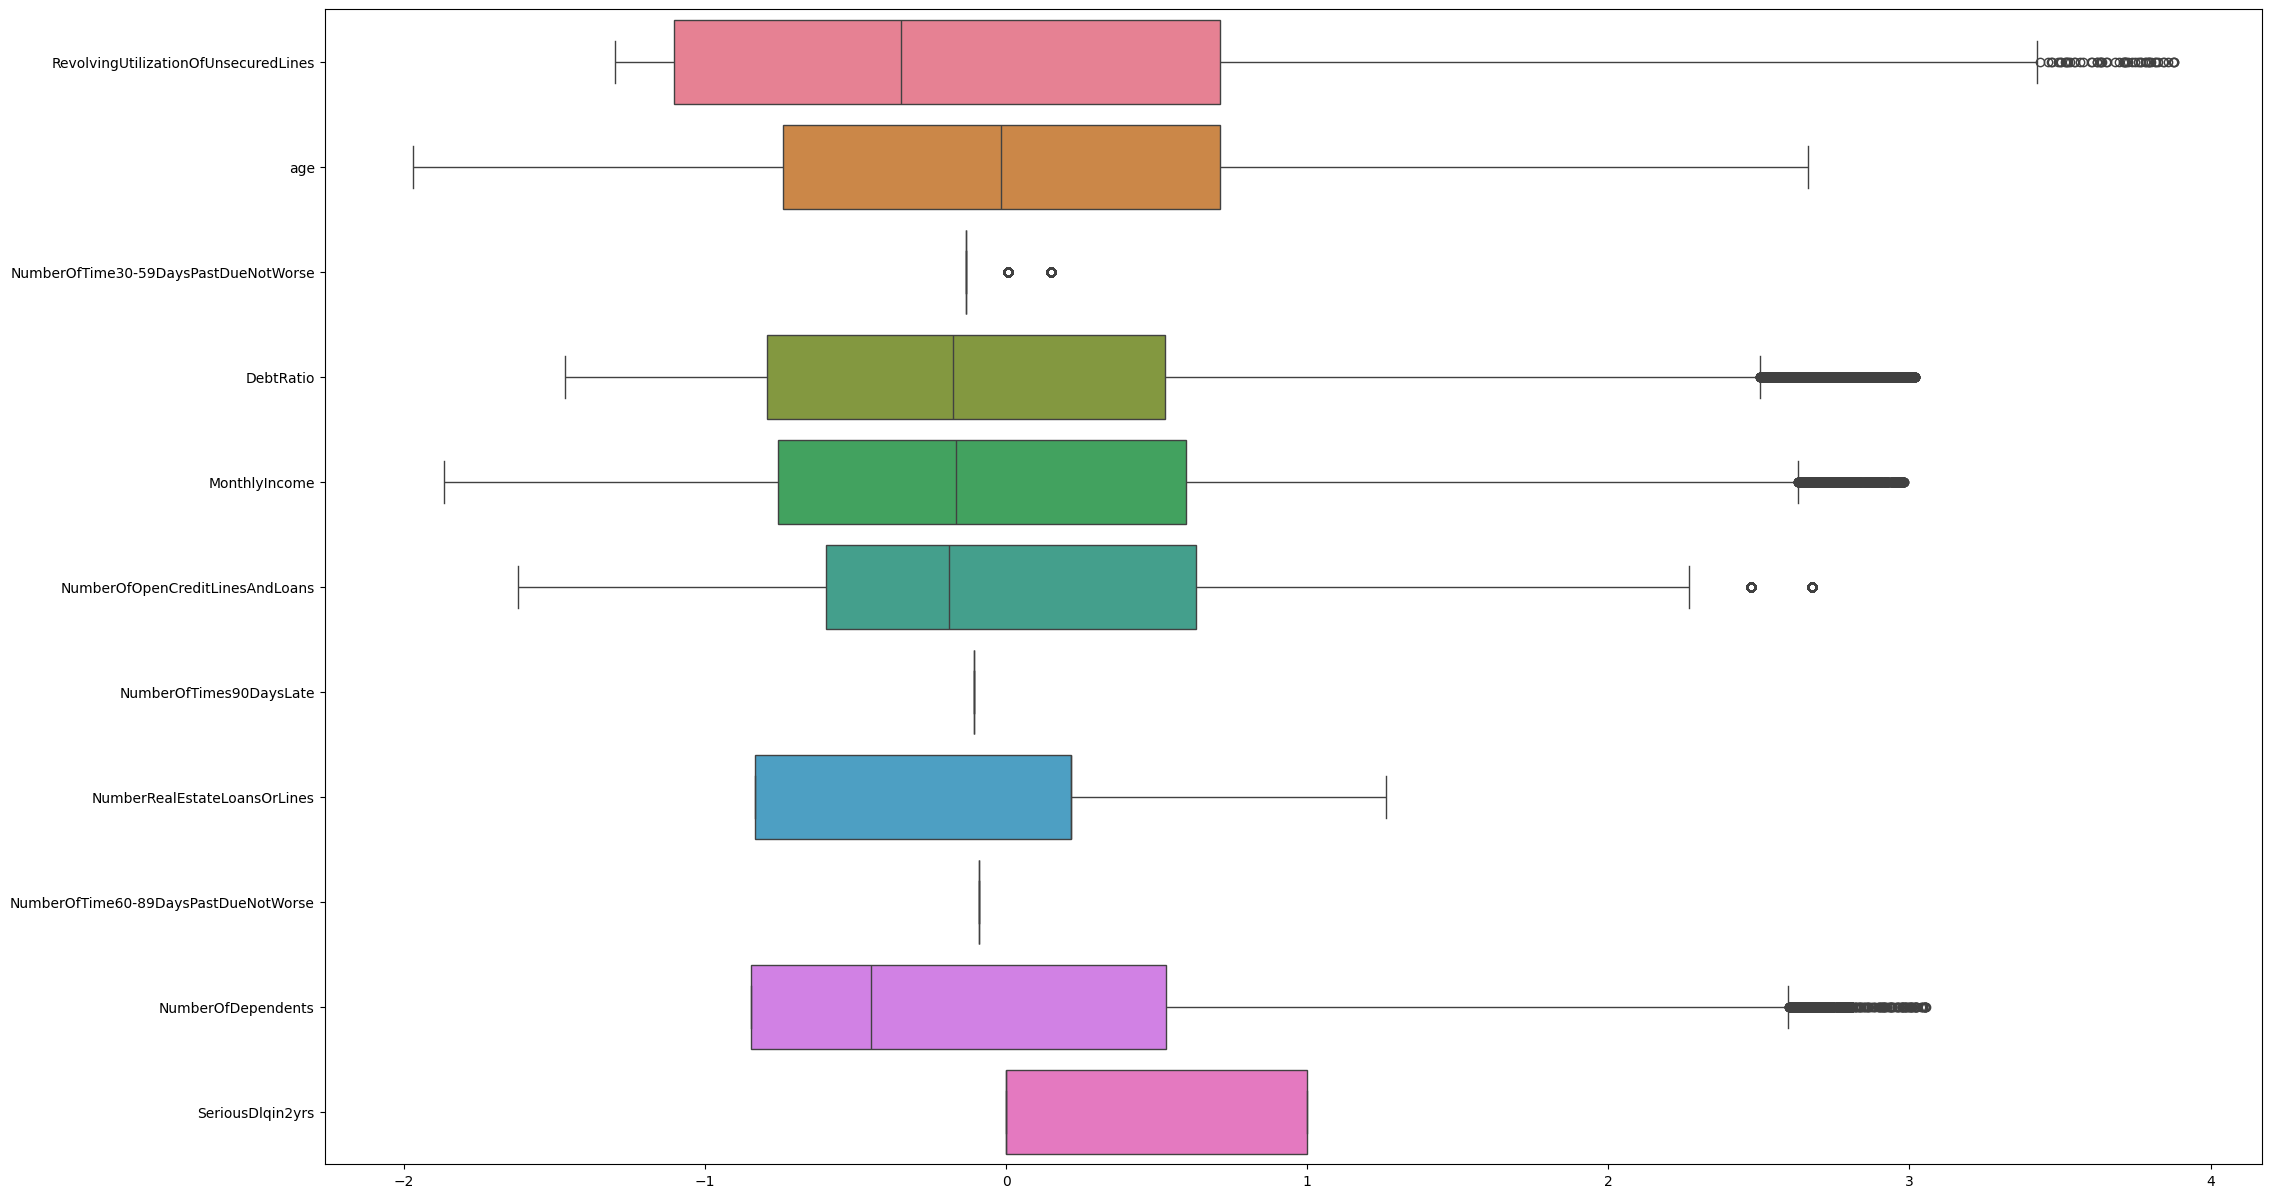

In [67]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df,orient='h')

In [68]:
df.head(3)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
1,1.183672,-0.594581,-0.134303,-0.949647,-0.983503,-0.801808,-0.10565,-0.832230,-0.090615,0.066466,0
3,-0.692571,-1.318723,-0.134303,-1.313369,-0.745513,-0.597179,-0.10565,-0.832230,-0.090615,-0.846458,0
4,-0.746086,1.867501,-0.134303,0.125631,-0.677516,-1.006437,-0.10565,0.215536,-0.090615,0.066466,0


In [69]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    84366
1    61520
Name: count, dtype: int64

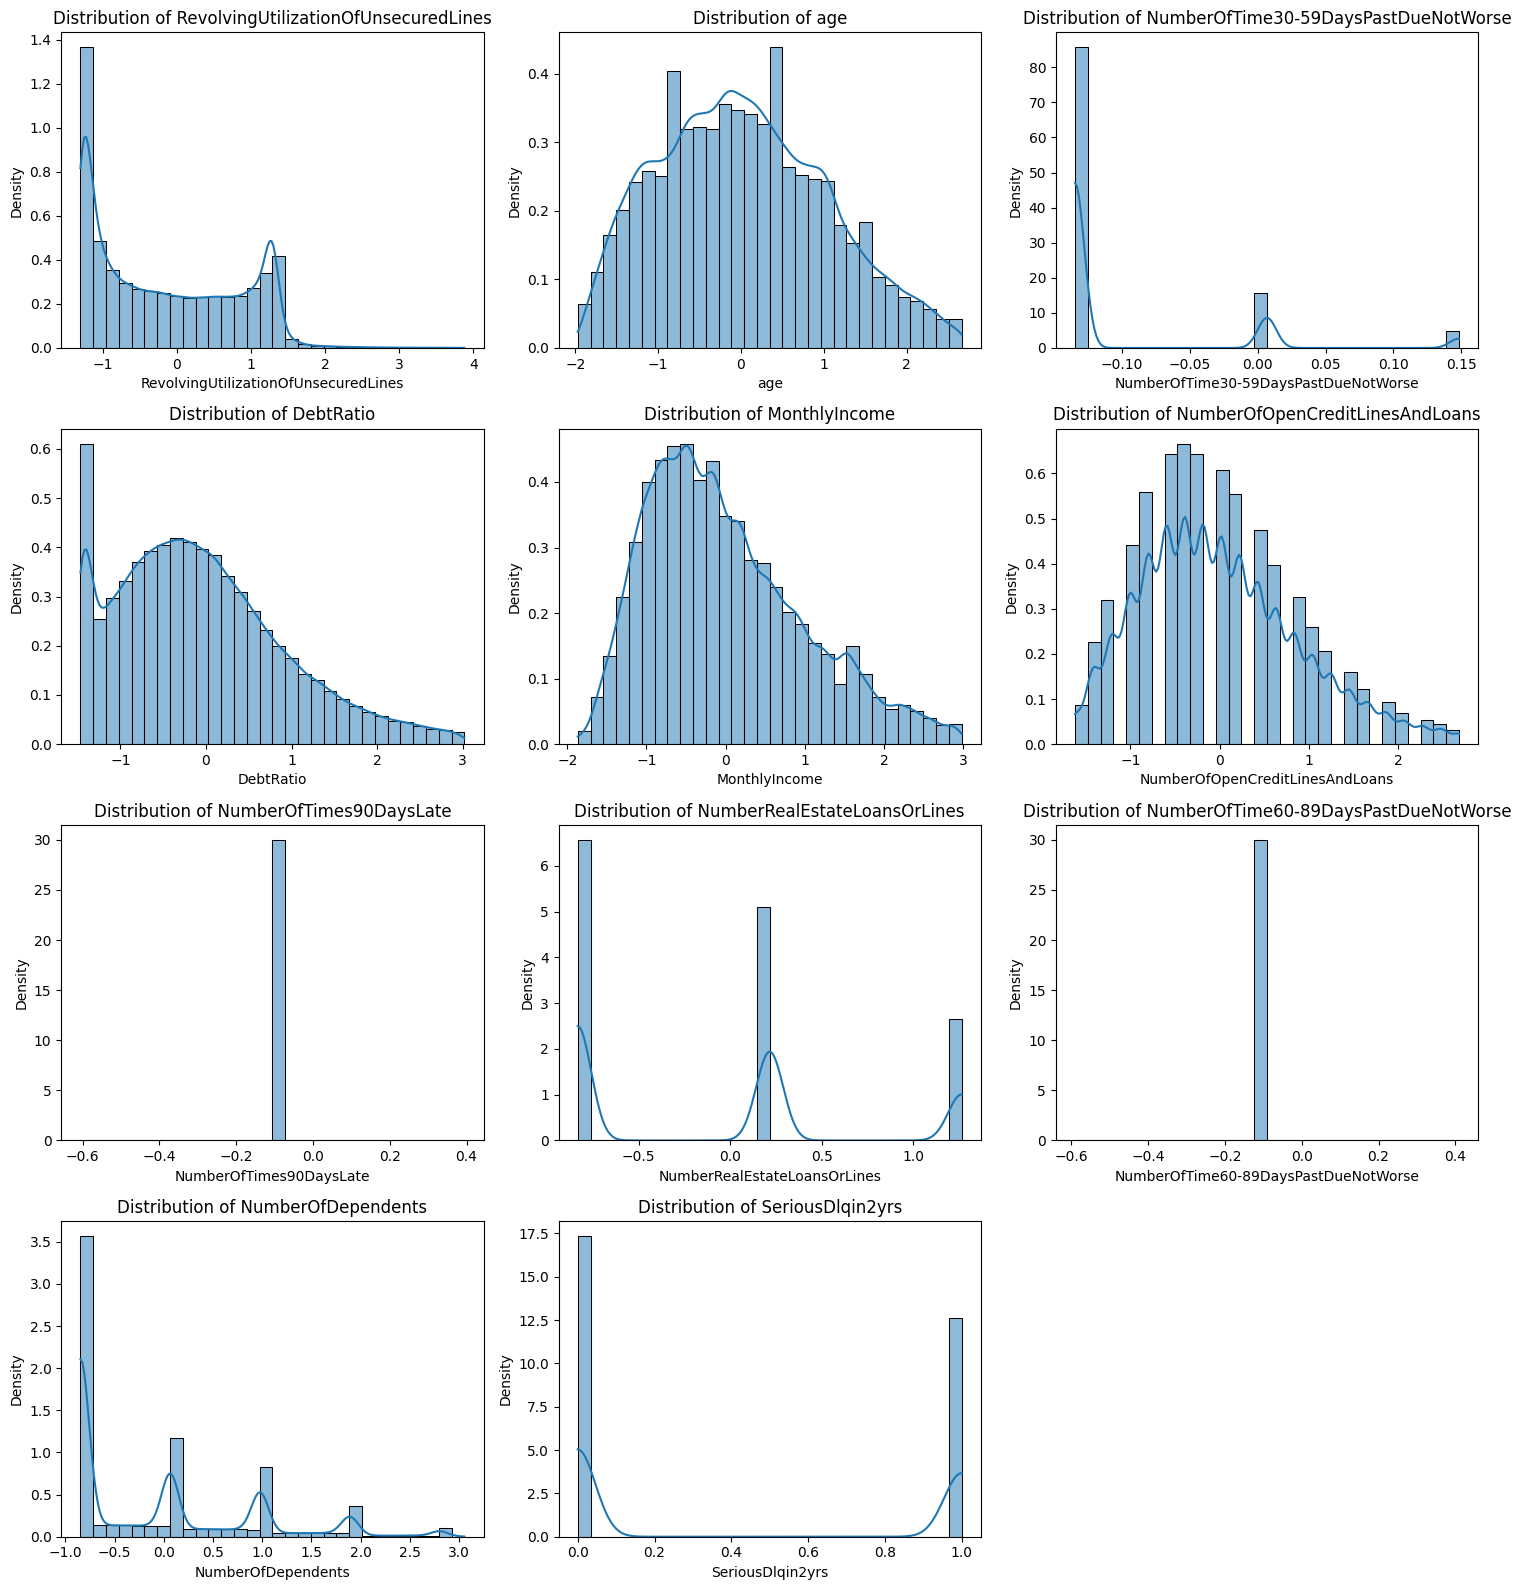

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size based on number of columns
num_cols = len(df.columns)
cols_per_row = 3
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, num_rows * 4))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(df[column], kde=True, stat="density", bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [71]:
df['RevolvingUtilizationOfUnsecuredLines'] = np.log1p(df['RevolvingUtilizationOfUnsecuredLines'] - df['RevolvingUtilizationOfUnsecuredLines'].min() + 1)
df['MonthlyIncome'] = np.log1p(df['MonthlyIncome'] - df['MonthlyIncome'].min() + 1)
df['DebtRatio'] = np.log1p(df['DebtRatio'] - df['DebtRatio'].min() + 1)


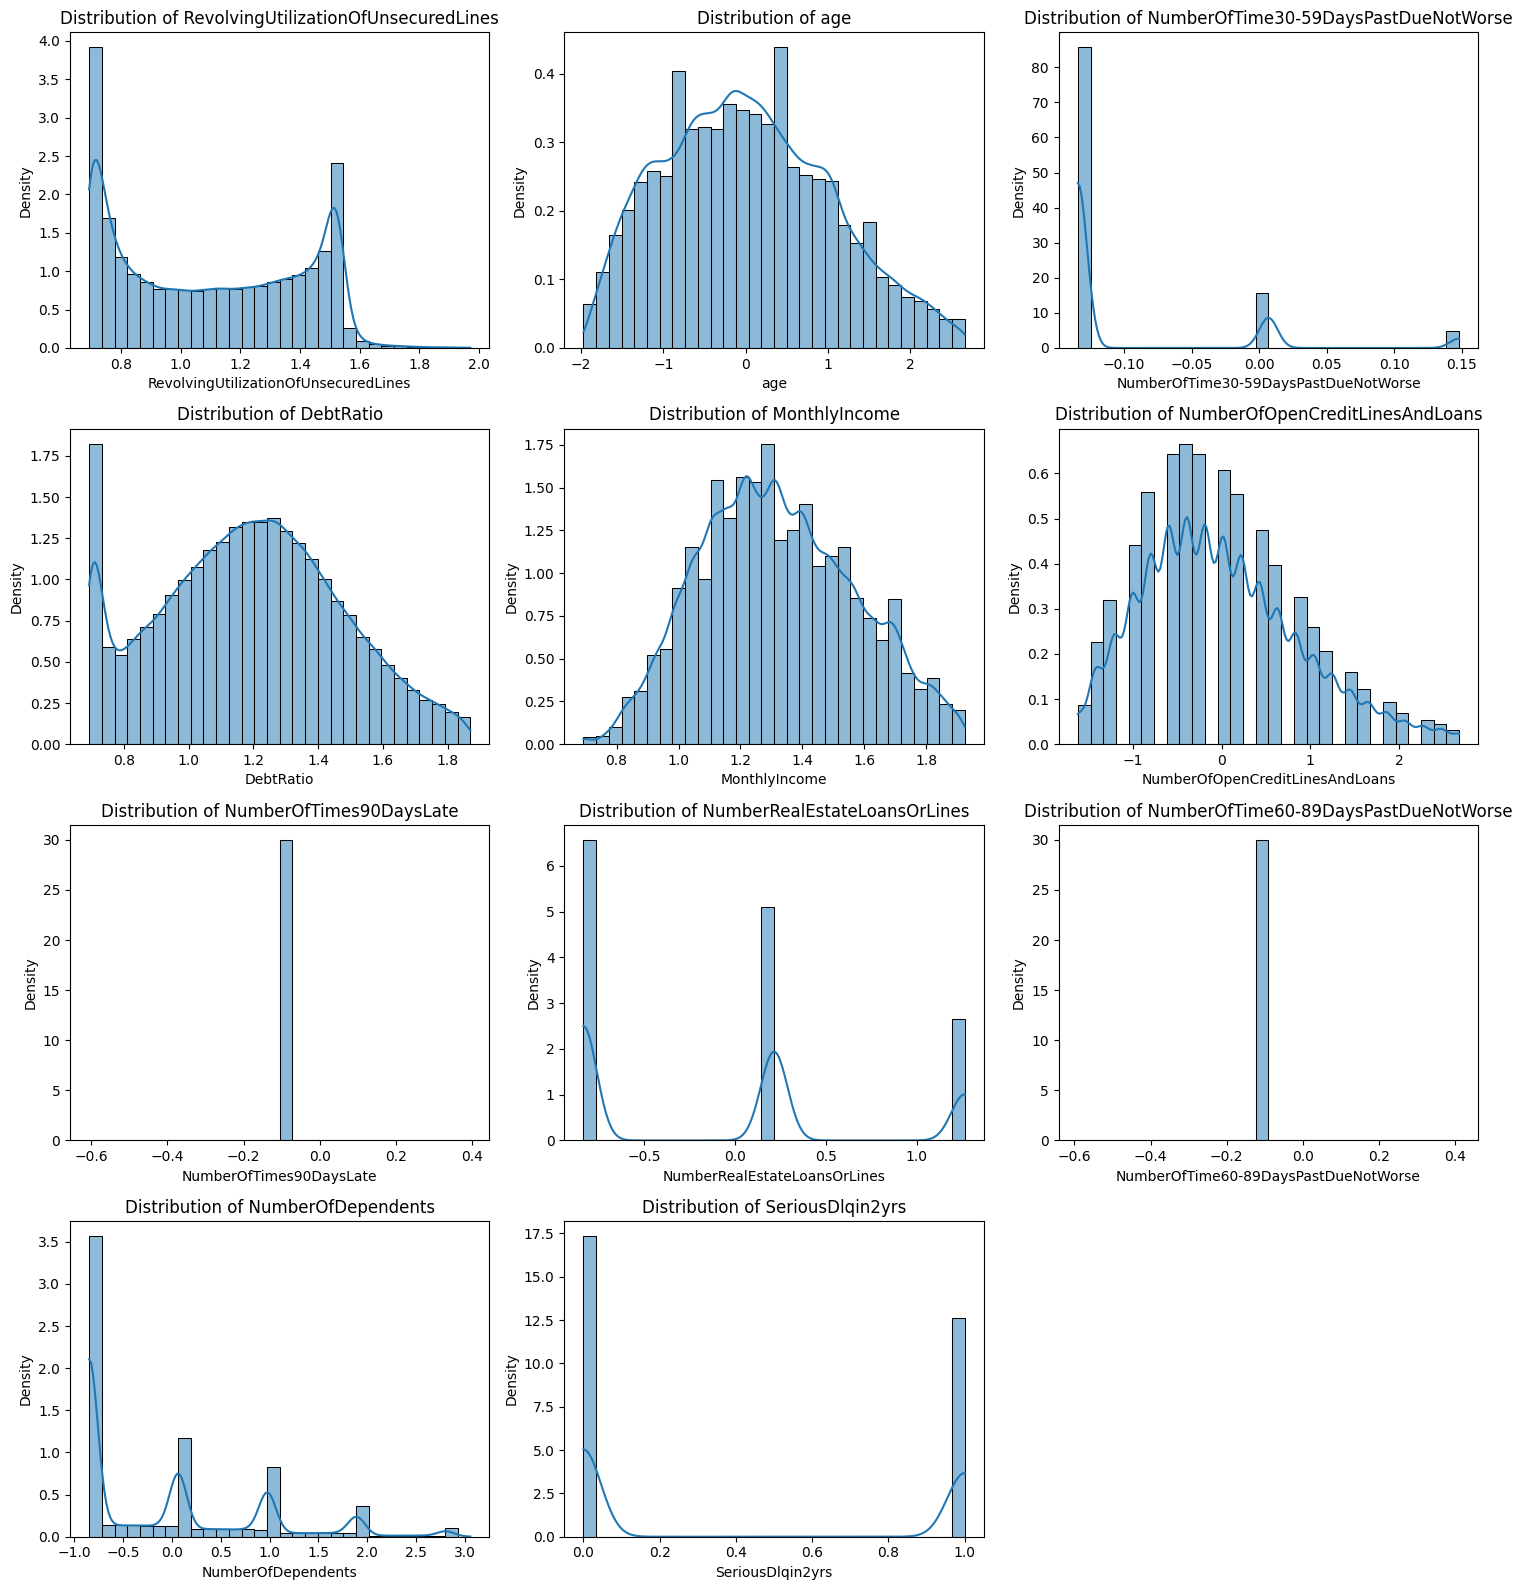

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size based on number of columns
num_cols = len(df.columns)
cols_per_row = 3
num_rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 5, num_rows * 4))

for i, column in enumerate(df.columns):
    plt.subplot(num_rows, cols_per_row, i + 1)
    sns.histplot(df[column], kde=True, stat="density", bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

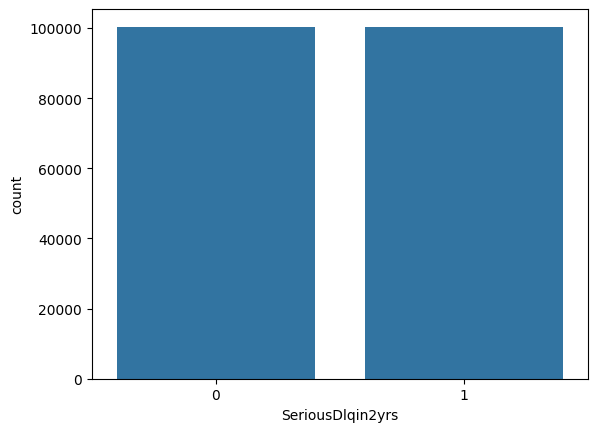

In [190]:
sns.countplot(x='SeriousDlqin2yrs',data=df)

In [76]:
df.to_csv('data/preprocessed_credit_data.csv', index=False)


In [73]:
df.head(3)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
1,1.500228,-0.594581,-0.134303,0.922867,1.059165,-0.801808,-0.10565,-0.832230,-0.090615,0.066466,0
3,0.957996,-1.318723,-0.134303,0.766757,1.138458,-0.597179,-0.10565,-0.832230,-0.090615,-0.846458,0
4,0.937251,1.867501,-0.134303,1.278646,1.160004,-1.006437,-0.10565,0.215536,-0.090615,0.066466,0


In [85]:
test_df=pd.read_csv('data/cs-test.csv')

In [86]:
del test_df['Unnamed: 0']

In [87]:
test_df.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0


In [88]:
temp=test_df['SeriousDlqin2yrs']

In [89]:
test_df.drop('SeriousDlqin2yrs' ,axis=1,inplace=True)

In [90]:
test_df['SeriousDlqin2yrs']=temp

In [91]:
test_df.head(3)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0,NaN
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0,NaN
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0,NaN


In [92]:
test_df.isnull().sum()

RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
SeriousDlqin2yrs                        101503
dtype: int64

In [93]:
test_df.drop('SeriousDlqin2yrs' ,axis=1,inplace=True)

In [94]:
test_df.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

In [103]:
test_df.dropna(inplace=True)

In [104]:
test_df.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [105]:
test_df['SeriousDlqin2yrs']=temp

In [106]:
test_df.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                               0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
SeriousDlqin2yrs                        81400
dtype: int64

In [107]:
test_df.to_csv('data/test_df.csv', index=False)
